## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## IMDB DATA

In [2]:
headers=['NO','Movie_Name','Year','MPAA','Duration(in_min)','Genre','ImDb_Rating','Meta_score','Director','Actor','Votes','Gross_in_dollars(in_million)']

In [3]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\6th sem\Data visu\case\imdb.csv",names=headers)

In [4]:
df.head()


NO          Movie_Name  Year MPAA Duration(in_min)                    Genre  \
0  1       The Godfather -1972    R          175 min             Crime, Drama   
1  2          Goodfellas -1990    R          145 min  Biography, Crime, Drama   
2  3        Pulp Fiction -1994    R          154 min             Crime, Drama   
3  4  The Usual Suspects -1995    R          106 min    Crime, Drama, Mystery   
4  5      Apocalypse Now -1979    R          147 min      Drama, Mystery, War   

   ImDb_Rating  Meta_score              Director           Actor      Votes  \
0          9.2       100.0  Francis Ford Coppola   Marlon Brando  19,96,195   
1          8.7        92.0       Martin Scorsese  Robert De Niro  12,47,143   
2          8.9        95.0     Quentin Tarantino   John Travolta  22,00,785   
3          8.5        76.0          Bryan Singer    Kevin Spacey  11,38,931   
4          8.4        94.0  Francis Ford Coppola    Martin Sheen   7,05,328   

  Gross_in_dollars(in_million)  
0                     $134.97M  
1                      $46.84M  
2                     $107.93M  
3                      $23.34M  
4                      $83.47M

## PREPROCESSING

In [5]:
df['Duration(in_min)'] = df['Duration(in_min)'].str.replace(' min', '')
df.head(2)

NO     Movie_Name  Year MPAA Duration(in_min)                    Genre  \
0  1  The Godfather -1972    R              175             Crime, Drama   
1  2     Goodfellas -1990    R              145  Biography, Crime, Drama   

   ImDb_Rating  Meta_score              Director           Actor      Votes  \
0          9.2       100.0  Francis Ford Coppola   Marlon Brando  19,96,195   
1          8.7        92.0       Martin Scorsese  Robert De Niro  12,47,143   

  Gross_in_dollars(in_million)  
0                     $134.97M  
1                      $46.84M

In [6]:
df['Year'] = df['Year'].astype(str).str.replace('-', '')
df.head(2)

NO     Movie_Name  Year MPAA Duration(in_min)                    Genre  \
0  1  The Godfather  1972    R              175             Crime, Drama   
1  2     Goodfellas  1990    R              145  Biography, Crime, Drama   

   ImDb_Rating  Meta_score              Director           Actor      Votes  \
0          9.2       100.0  Francis Ford Coppola   Marlon Brando  19,96,195   
1          8.7        92.0       Martin Scorsese  Robert De Niro  12,47,143   

  Gross_in_dollars(in_million)  
0                     $134.97M  
1                      $46.84M

In [7]:
df['Gross_in_dollars(in_million)'] = df['Gross_in_dollars(in_million)'].str.replace('M', '')
df['Gross_in_dollars(in_million)'] = df['Gross_in_dollars(in_million)'].str.replace('$', '')
#regex=True
df.head(2)

C:\Users\HP\AppData\Local\Temp/ipykernel_14504/2318291456.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Gross_in_dollars(in_million)'] = df['Gross_in_dollars(in_million)'].str.replace('$', '')


NO     Movie_Name  Year MPAA Duration(in_min)                    Genre  \
0  1  The Godfather  1972    R              175             Crime, Drama   
1  2     Goodfellas  1990    R              145  Biography, Crime, Drama   

   ImDb_Rating  Meta_score              Director           Actor      Votes  \
0          9.2       100.0  Francis Ford Coppola   Marlon Brando  19,96,195   
1          8.7        92.0       Martin Scorsese  Robert De Niro  12,47,143   

  Gross_in_dollars(in_million)  
0                       134.97  
1                        46.84

In [8]:
df['Votes'] = df['Votes'].replace(',', '', regex=True)

In [9]:
df['Genre'] = df['Genre'].apply(lambda x: x.split()[0].rstrip(','))

In [10]:
df

NO          Movie_Name  Year MPAA Duration(in_min)      Genre  \
0           1       The Godfather  1972    R              175      Crime   
1           2          Goodfellas  1990    R              145  Biography   
2           3        Pulp Fiction  1994    R              154      Crime   
3           4  The Usual Suspects  1995    R              106      Crime   
4           5      Apocalypse Now  1979    R              147      Drama   
..        ...                 ...   ...  ...              ...        ...   
995       996            Blade II  2002    R              117     Action   
996       997        Falling Down  1993    R              113     Action   
997       998      Eyes Wide Shut  1999    R              159      Drama   
998       999       The Lost Boys  1987    R               97     Comedy   
999  1,000.00          Deadpool 2  2018    R              119     Action   

     ImDb_Rating  Meta_score              Director            Actor    Votes  \
0            9.2       100.0  Francis Ford Coppola    Marlon Brando  1996195   
1            8.7        92.0       Martin Scorsese   Robert De Niro  1247143   
2            8.9        95.0     Quentin Tarantino    John Travolta  2200785   
3            8.5        76.0          Bryan Singer     Kevin Spacey  1138931   
4            8.4        94.0  Francis Ford Coppola     Martin Sheen   705328   
..           ...         ...                   ...              ...      ...   
995          6.7        52.0    Guillermo del Toro    Wesley Snipes   232965   
996          7.6        56.0       Joel Schumacher  Michael Douglas   205271   
997          7.5        69.0       Stanley Kubrick       Tom Cruise   372204   
998          7.2        63.0       Joel Schumacher     Jason Patric   159876   
999          7.6        66.0          David Leitch    Ryan Reynolds   638822   

    Gross_in_dollars(in_million)  
0                         134.97  
1                          46.84  
2                         107.93  
3                          23.34  
4                          83.47  
..                           ...  
995                        82.35  
996                        40.90  
997                        55.69  
998                        32.22  
999                       324.59  

[1000 rows x 12 columns]

## FINDING AND REPLACING MISSING VALUES

In [11]:
df.isnull().sum()

NO                               0
Movie_Name                       0
Year                             0
MPAA                             0
Duration(in_min)                 0
Genre                            0
ImDb_Rating                      0
Meta_score                      35
Director                         0
Actor                            0
Votes                            0
Gross_in_dollars(in_million)    65
dtype: int64

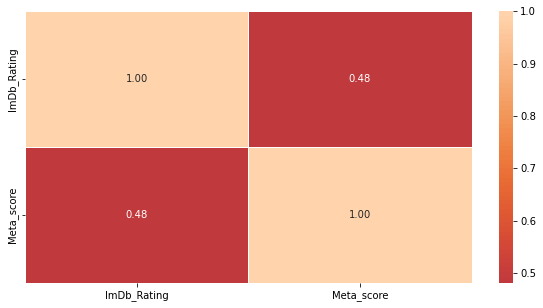

In [12]:
plt.subplots(figsize = (10,5))
sns.heatmap (df.corr(), annot = True,linewidths =0.75,linecolor = "White",fmt = ".2f",center = -0.1)
plt.show()

#### From heatmap now we know that meta score is highly correlated with imDb rating and Gross with Votes

In [13]:
df = df.sort_values(by='ImDb_Rating')

In [14]:
df['Meta_score'].fillna(method='bfill', inplace=True)


In [15]:
df.isnull().sum()

NO                               0
Movie_Name                       0
Year                             0
MPAA                             0
Duration(in_min)                 0
Genre                            0
ImDb_Rating                      0
Meta_score                       0
Director                         0
Actor                            0
Votes                            0
Gross_in_dollars(in_million)    65
dtype: int64

In [16]:


print(df['Gross_in_dollars(in_million)'].dtypes)

object


In [17]:
df['Gross_in_dollars(in_million)'] = pd.to_numeric(df['Gross_in_dollars(in_million)'], errors='coerce')

In [18]:
correlation_matrix = df.corr()
gross_correlation = correlation_matrix['Gross_in_dollars(in_million)']

# Sort columns by correlation with gross (excluding gross itself)
sorted_columns = gross_correlation.sort_values(ascending=False)[1:].index.tolist()

# Print the column with the highest correlation
print("Column with highest correlation with gross:", sorted_columns[0])
print(gross_correlation)

Column with highest correlation with gross: ImDb_Rating
ImDb_Rating                     0.194592
Meta_score                      0.016402
Gross_in_dollars(in_million)    1.000000
Name: Gross_in_dollars(in_million), dtype: float64


In [19]:
df['Votes']=pd.to_numeric(df['Votes'],errors='coerce')
df

NO                                     Movie_Name  Year   MPAA  \
760  761                                Spring Breakers  2012      R   
700  701                                     Piranha 3D  2010      R   
827  828                                           Noah  2014  PG-13   
567  568                                         Splice  2009      R   
633  634                                          Brüno  2009      R   
..   ...                                            ...   ...    ...   
75    76  The Lord of the Rings: The Return of the King  2003  PG-13   
17    18                                The Dark Knight  2008  PG-13   
7      8                               Schindler's List  1993      R   
0      1                                  The Godfather  1972      R   
10    11                       The Shawshank Redemption  1994      R   

    Duration(in_min)      Genre  ImDb_Rating  Meta_score  \
760               94      Crime          5.3        63.0   
700               88     Comedy          5.5        53.0   
827              138     Action          5.8        68.0   
567              104     Horror          5.8        66.0   
633               81     Comedy          5.9        54.0   
..               ...        ...          ...         ...   
75               201     Action          9.0        94.0   
17               152     Action          9.0        84.0   
7                195  Biography          9.0        95.0   
0                175      Crime          9.2       100.0   
10               142      Drama          9.3        82.0   

                 Director              Actor    Votes  \
760        Harmony Korine    Vanessa Hudgens   148123   
700         Alexandre Aja     Elisabeth Shue    96148   
827      Darren Aronofsky      Russell Crowe   265354   
567       Vincenzo Natali       Adrien Brody   101416   
633         Larry Charles  Sacha Baron Cohen   153475   
..                    ...                ...      ...   
75          Peter Jackson        Elijah Wood  1962880   
17      Christopher Nolan     Christian Bale  2847239   
7        Steven Spielberg        Liam Neeson  1439504   
0    Francis Ford Coppola      Marlon Brando  1996195   
10         Frank Darabont        Tim Robbins  2865759   

     Gross_in_dollars(in_million)  
760                         14.12  
700                         25.00  
827                        101.20  
567                         17.00  
633                         60.05  
..                            ...  
75                         377.85  
17                         534.86  
7                           96.90  
0                          134.97  
10                          28.34  

[1000 rows x 12 columns]

In [20]:
df = df.sort_values(by='Votes')
df['Gross_in_dollars(in_million)'].fillna(method='bfill', inplace=True)

In [21]:
df.isnull().sum()

NO                              0
Movie_Name                      0
Year                            0
MPAA                            0
Duration(in_min)                0
Genre                           0
ImDb_Rating                     0
Meta_score                      0
Director                        0
Actor                           0
Votes                           0
Gross_in_dollars(in_million)    0
dtype: int64

In [22]:
df['MPAA'] = df['MPAA'].replace('Not Rated', 'Unrated')

In [23]:
df.dtypes

NO                               object
Movie_Name                       object
Year                             object
MPAA                             object
Duration(in_min)                 object
Genre                            object
ImDb_Rating                     float64
Meta_score                      float64
Director                         object
Actor                            object
Votes                             int64
Gross_in_dollars(in_million)    float64
dtype: object

In [24]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [25]:
df['Duration(in_min)'] = pd.to_numeric(df['Duration(in_min)'], errors='coerce')

In [26]:
df.drop('NO',axis=1,inplace=True)


# CHECK FOR DUPLICATED DATA

In [27]:
dupdf=df.duplicated().any()

In [28]:
print("Are there any duplicated values? ",dupdf)

Are there any duplicated values?  False


In [29]:
df=df.drop_duplicates()
df

Movie_Name  Year     MPAA  \
695  Once in a Lifetime: The Extraordinary Story of...  2006    PG-13   
679                                    White Lightnin'  2009  Unrated   
841                                      Monument Ave.  1998        R   
944                          Shut Up and Play the Hits  2012  Unrated   
571                                     Next Goal Wins  2014  Unrated   
..                                                 ...   ...      ...   
65                                        Forrest Gump  1994    PG-13   
6                                           Fight Club  1999        R   
99                                           Inception  2010    PG-13   
17                                     The Dark Knight  2008    PG-13   
10                            The Shawshank Redemption  1994        R   

     Duration(in_min)        Genre  ImDb_Rating  Meta_score  \
695                97  Documentary          7.3        67.0   
679                92    Biography          7.0        56.0   
841                93        Crime          6.6        71.0   
944               108  Documentary          7.3        72.0   
571                97  Documentary          7.8        71.0   
..                ...          ...          ...         ...   
65                142        Drama          8.8        82.0   
6                 139        Drama          8.8        67.0   
99                148       Action          8.8        74.0   
17                152       Action          9.0        84.0   
10                142        Drama          9.3        82.0   

              Director              Actor    Votes  \
695       Paul Crowder         John Dower     1531   
679     Dominic Murphy        Muse Watson     1842   
841          Ted Demme        Denis Leary     1874   
944      Will Lovelace     Dylan Southern     2882   
571         Mike Brett      Steve Jamison     3051   
..                 ...                ...      ...   
65     Robert Zemeckis          Tom Hanks  2237404   
6        David Fincher          Brad Pitt  2300999   
99   Christopher Nolan  Leonardo DiCaprio  2528563   
17   Christopher Nolan     Christian Bale  2847239   
10      Frank Darabont        Tim Robbins  2865759   

     Gross_in_dollars(in_million)  
695                          0.14  
679                          0.33  
841                          0.33  
944                          0.51  
571                          0.04  
..                            ...  
65                         330.25  
6                           37.03  
99                         292.58  
17                         534.86  
10                          28.34  

[1000 rows x 11 columns]

## DATA STATISTICS

In [30]:
df.describe(include='all')

Movie_Name         Year  MPAA  Duration(in_min)   Genre  ImDb_Rating  \
count        1000  1000.000000  1000       1000.000000    1000  1000.000000   
unique        995          NaN    15               NaN      16          NaN   
top         Crash          NaN     R               NaN  Action          NaN   
freq            2          NaN   584               NaN     238          NaN   
mean          NaN  1996.079000   NaN        116.876000     NaN     7.537800   
std           NaN    16.541353   NaN         24.148992     NaN     0.558662   
min           NaN  1933.000000   NaN         70.000000     NaN     5.300000   
25%           NaN  1988.000000   NaN        100.000000     NaN     7.200000   
50%           NaN  2000.000000   NaN        113.000000     NaN     7.500000   
75%           NaN  2009.000000   NaN        128.000000     NaN     7.900000   
max           NaN  2020.000000   NaN        334.000000     NaN     9.300000   

        Meta_score         Director       Actor         Votes  \
count   1000.00000             1000        1000  1.000000e+03   
unique         NaN              524         575           NaN   
top            NaN  Martin Scorsese  Tom Cruise           NaN   
freq           NaN               18          17           NaN   
mean      74.44100              NaN         NaN  3.359503e+05   
std       12.23144              NaN         NaN  3.876813e+05   
min       31.00000              NaN         NaN  1.531000e+03   
25%       66.00000              NaN         NaN  8.054150e+04   
50%       75.00000              NaN         NaN  2.001930e+05   
75%       83.00000              NaN         NaN  4.353600e+05   
max      100.00000              NaN         NaN  2.865759e+06   

        Gross_in_dollars(in_million)  
count                    1000.000000  
unique                           NaN  
top                              NaN  
freq                             NaN  
mean                       67.286270  
std                        98.845761  
min                         0.000000  
25%                         5.462500  
50%                        30.180000  
75%                        90.617500  
max                       936.660000

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 695 to 10
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Movie_Name                    1000 non-null   object 
 1   Year                          1000 non-null   int64  
 2   MPAA                          1000 non-null   object 
 3   Duration(in_min)              1000 non-null   int64  
 4   Genre                         1000 non-null   object 
 5   ImDb_Rating                   1000 non-null   float64
 6   Meta_score                    1000 non-null   float64
 7   Director                      1000 non-null   object 
 8   Actor                         1000 non-null   object 
 9   Votes                         1000 non-null   int64  
 10  Gross_in_dollars(in_million)  1000 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


# VISUALIZATION

# Univariate Analysis

## 1. How the IMDB Ratings of top movies are distributed

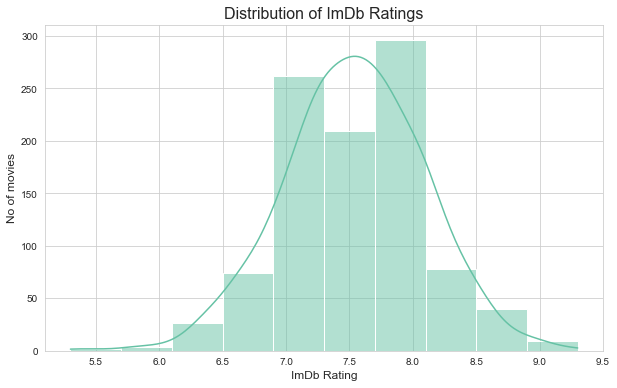

In [32]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

plt.figure(figsize=(10, 6))
sns.histplot(df['ImDb_Rating'], bins=10, kde=True)
plt.title('Distribution of ImDb Ratings', fontsize=16)
plt.xlabel('ImDb Rating', fontsize=12)  
plt.ylabel('No of movies', fontsize=12)  
plt.show()

The graph shows the distribution of IMDb ratings for a collection of movies, which is skewed to the right and has a single mode 
at around 8.0.
The graph suggests that most movies have a relatively high IMDb rating, with more than half of them having a rating above 7.0. 
This could indicate that IMDb users tend to rate movies favorably, or that the collection of movies is biased towards 
higher-quality ones.
The graph also reveals that there are very few movies with extremely low or high ratings, 
as the frequency drops sharply below 6.0 and above 8.5. 
This could imply that IMDb ratings are not very sensitive to outliers, or that movies with extreme ratings are rare or unpopular
since the data is about top 1000 movies.
hence the movies with good rating falls under the list of top 1000

##  2. Which genre is the leading among the list of top 1000 movies 


<AxesSubplot:xlabel='Genre', ylabel='Count'>

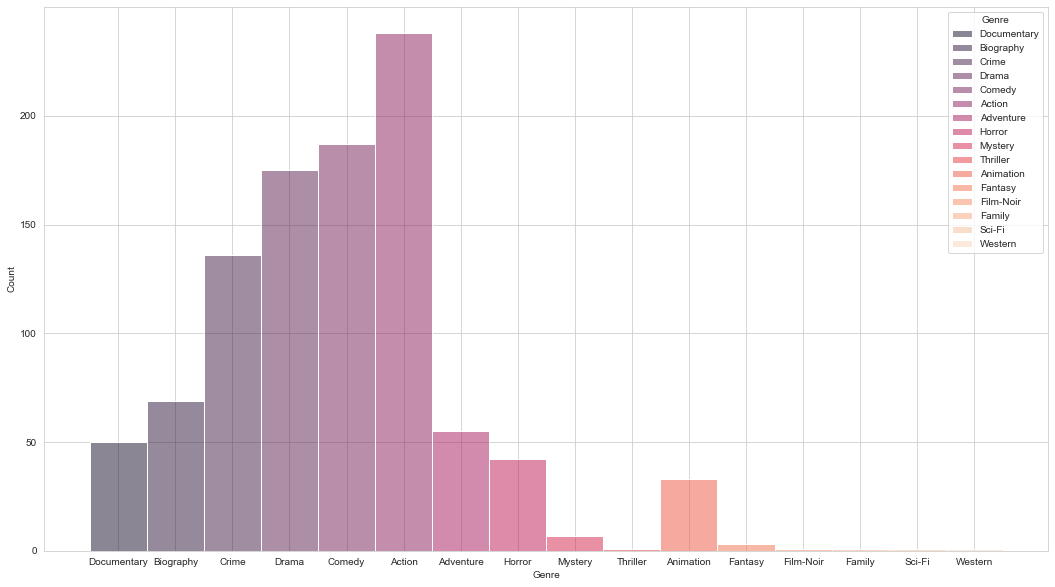

In [33]:
plt.figure(figsize=(18,10))
sns.histplot(x='Genre',data=df,hue='Genre',palette='rocket')

The histogram shows the distribution of movies across different genres. 
Each bar represents a genre, and the height of the bar represents the number 
of movies in that genre
useful to understand the distribution of movies across genres. 
The plot shows that among the list of top 1000 movies ,
action movies dominates

## 3. What genre movies are mostly done by the top 10 directors 

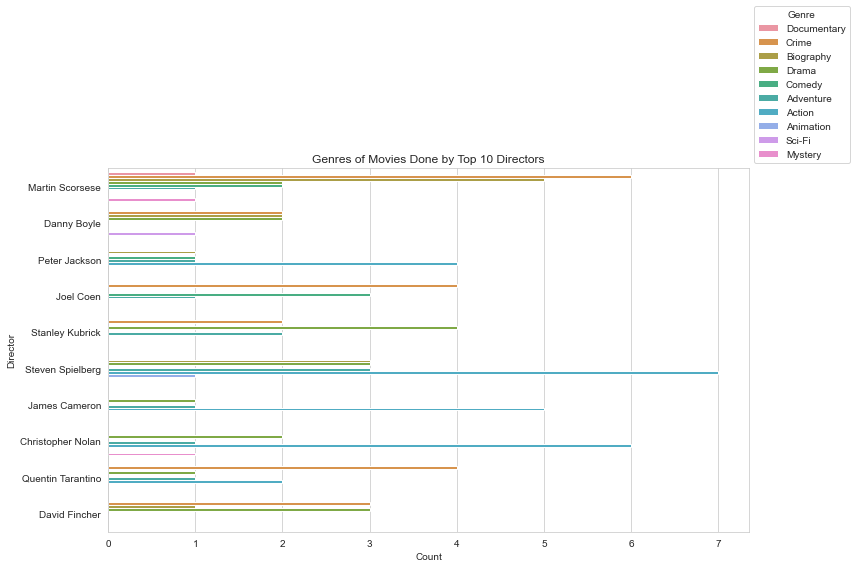

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 directors with the most movies
top_directors = df['Director'].value_counts().nlargest(10).index

# Filter the dataframe for these top directors
df_top_directors = df[df['Director'].isin(top_directors)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_top_directors, y='Director', hue='Genre')
plt.title('Genres of Movies Done by Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The countplot shows the genres of movies done by the top 10 directors
each director has bars representing different movie genres they have worked on
color coded as per the legend
Useful to understand which genres are most popular among the top directors.

## 4. Movies released which year in the 2000s era have toped the list

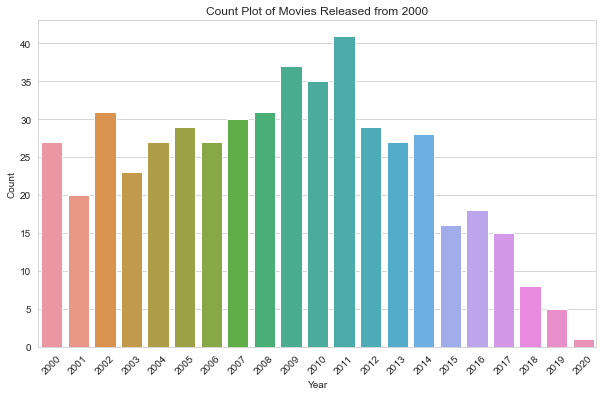

In [35]:
filtered_df = df[(df['Year'] >= 2000)]

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=filtered_df['Year'])
plt.title('Count Plot of Movies Released from 2000')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The count plot shows the number of movies released each year from 2000 onwards. 
Each bar represents a year, and the height of the bar represents the 
number of movies released in that year.
There seems to be a general upward trend in the number of movies released each year, with some fluctuations.
This plot can be useful to understand the trend in the number of movies released over time.

## 5. Which movie genre dominates the list of top 1000 films 

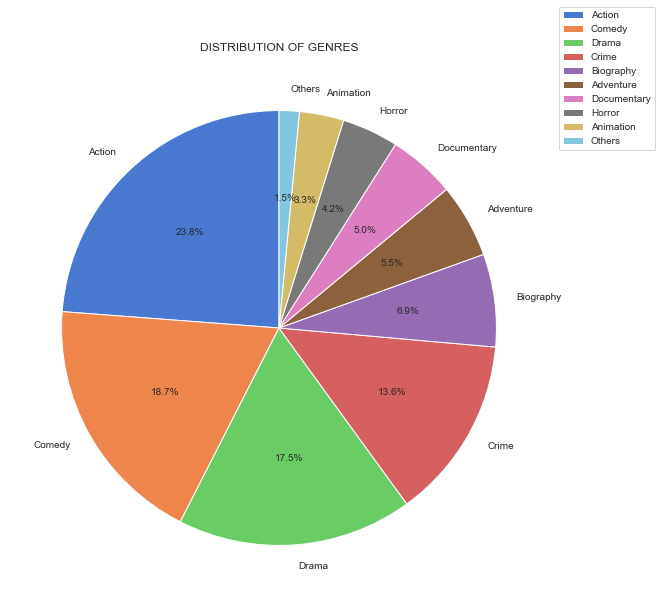

In [36]:
genre_distribution = df['Genre'].value_counts()
threshold = 0.03
small_genres = genre_distribution[genre_distribution / genre_distribution.sum() < threshold].index
df['Grouped_Genre'] = df['Genre'].apply(lambda x: x if x not in small_genres else 'Others')
grouped_genre_distribution = df['Grouped_Genre'].value_counts()

c=sns.color_palette("muted", n_colors=len(df['Actor'].unique()))
plt.figure(figsize=(10, 10))
plt.pie(grouped_genre_distribution, labels=grouped_genre_distribution.index, autopct='%1.1f%%', startangle=90,colors=c)
plt.title('DISTRIBUTION OF GENRES')
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1.1))
plt.show()

The graph shows the distribution of various film genres, which can be used to compare the popularity or
quantity of different film genres.
The graph indicates that Action is the most dominant genre, occupying nearly a quarter of the chart. 
This could suggest that action movies are more appealing, profitable, or widely produced than other genres.
The graph also shows that there are some genres that are very rare, such as Film-Noir, Animation, and Others, 
which collectively make up only 3% of the chart. This could indicate that these genres have a niche audience,
a limited scope, or a high production cost.

# BIVARIATE ANALYSIS

## 6.Total Gross in Dollars for Each Year

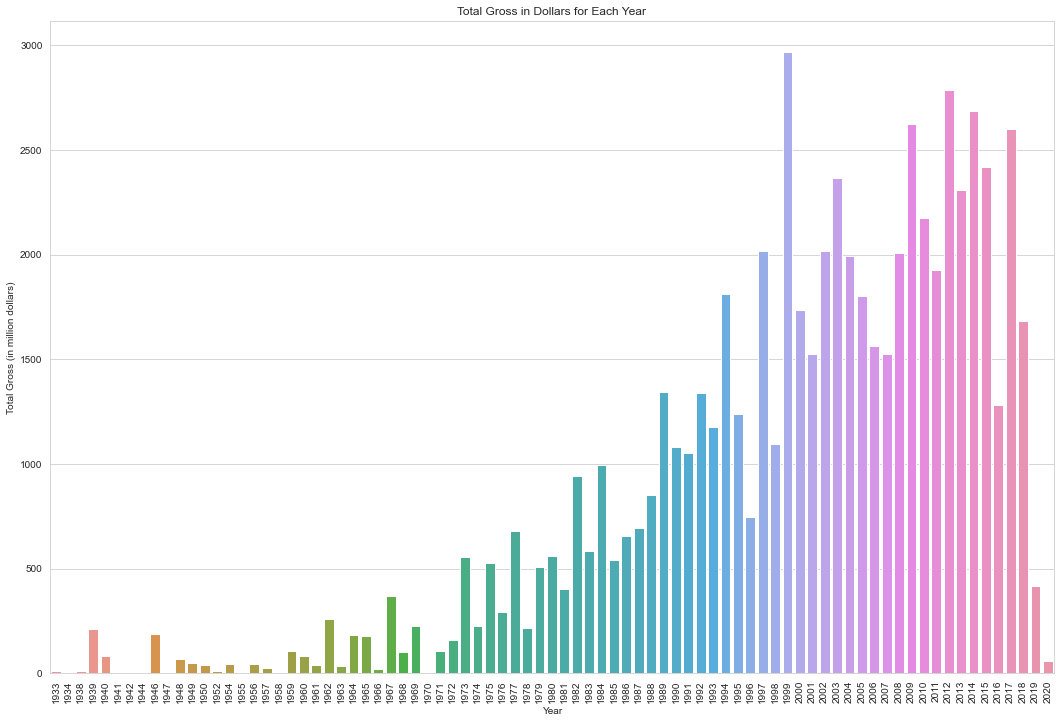

In [37]:
yearly_gross = df.groupby('Year')['Gross_in_dollars(in_million)'].sum().reset_index()
fig = plt.subplots(figsize=(18, 12))
sns.barplot(x='Year', y='Gross_in_dollars(in_million)', data=yearly_gross)
plt.title('Total Gross in Dollars for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Gross (in million dollars)')
plt.xticks(rotation=90)
plt.show()


inference:
The bar plot shows the total gross in dollars for each year, and it allows you to observe the overall trend in the movie earnings over the specified years.
There seems to be a general upward trend in the total gross over the years, with some fluctuations.
Year 1999 has higher total gross.
Year 1942 , 1947 ,1955 and 1970 have least total gross.

## 7. Votes for each Genre in 2018,2019 and 2020

Text(0, 0.5, 'Votes')

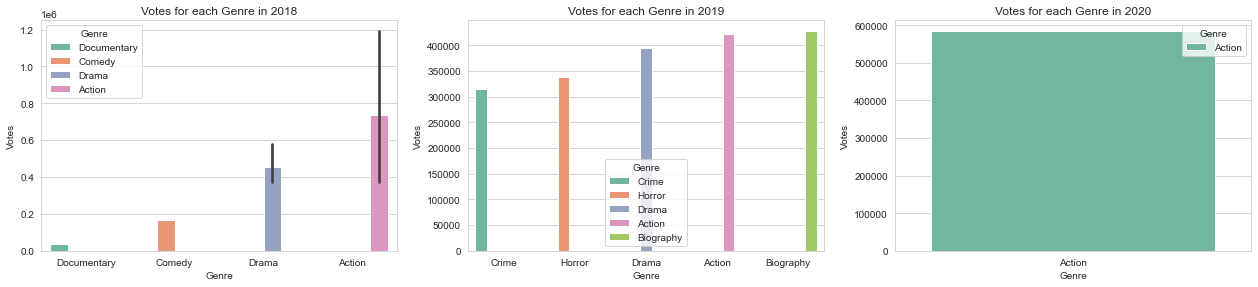

In [284]:
plt.subplots_adjust(left=0.2,right=3,bottom=0.1,top=0.9)
plt.subplot(1,3,1)
sns.barplot(x='Genre',y='Votes', data=df[df['Year'] == 2018],hue='Genre')
plt.title('Votes for each Genre in 2018')
plt.subplot(1,3,2)
sns.barplot(x='Genre',y='Votes',data=df[df['Year'] == 2019],hue='Genre')
plt.title('Votes for each Genre in 2019')
plt.subplot(1,3,3)
sns.barplot(x='Genre', y='Votes',data=df[df['Year'] == 2020],hue='Genre')
plt.title('Votes for each Genre in 2020')
plt.xlabel('Genre')
plt.ylabel('Votes')

Inference:
The bar plots show the number of votes for each genre in the years 2018, 2019, and 2020.
This plot can be useful to understand the popularity of different genres over time.
Action has the most popularity in the year 2018,2019 and 2020.
Documentary has the least popularity in the year 2018.


## 8.ImDb Rating and Votes of different Genres over years

In [38]:
px.scatter(df,x='Votes', y='ImDb_Rating',size='ImDb_Rating',color='Genre',animation_frame='Year')

Inference:
This plot can be useful to understand how the number of votes and IMDb ratings vary with genre and over time.
In 2006 Genre Documentary has Lowest popularity and 1942 there is no popularity.
The movies of Genre drama and crime remains the top rated over the years among the top 1000 movies.

## 9.ImDb rating of different MPAA


Text(0.5, 1.0, 'Violinplot')

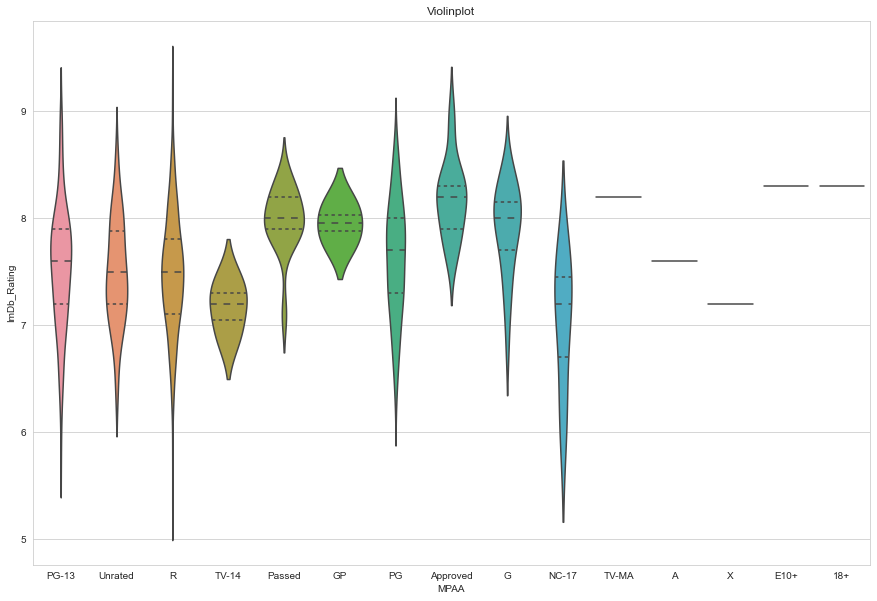

In [286]:
plt.figure(figsize=(15,10))
sns.violinplot(x='MPAA', y='ImDb_Rating', data=df,inner='quartile').set_title('Violinplot')

Inference:
The violin plot shows the distribution of IMDb ratings by MPAA rating. 
Each violin represents an MPAA rating, and the width of the violin at any given point is proportional to the number of movies with that rating. 
The most common rating for movies is around 7, regardless of the content category. 
The TV-14 category has the most variation in ratings, with two peaks at around 6.5 and 8.
The Passed, PG, Approved by MPAA, and G categories have similar distributions, with most ratings between 6 and 8.

## 10.Top-Rated Movies

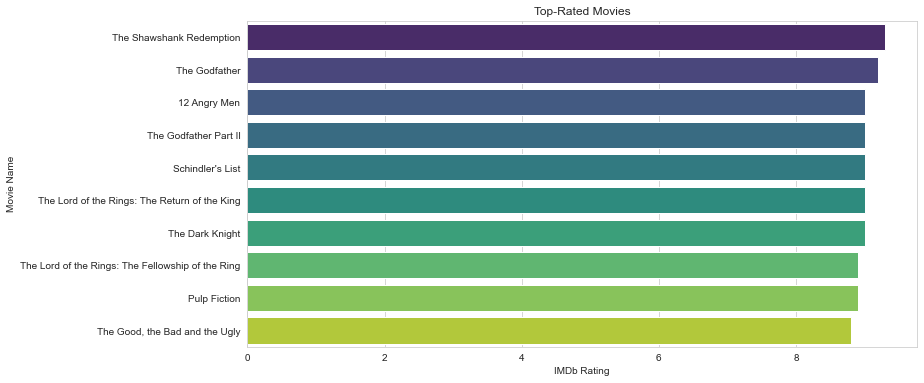

In [287]:
top_rated_movies = df.nlargest(10, 'ImDb_Rating')
plt.figure(figsize=(12, 6))
sns.barplot(x='ImDb_Rating', y='Movie_Name', data=top_rated_movies, palette='viridis')
plt.title('Top-Rated Movies')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Name')
plt.show()

Inference:
It shows the top ten movies in terms of ImDb rating.
The Shawshank Redemption is the highest rated movie interms ImDb Rating .
12 Angry Men,The Lord of the Rings,Schindlers List ,Godfather Part 2 and The dark Knight has almost equal Imdb Rating.

# 11.TOP 10 ACTORS

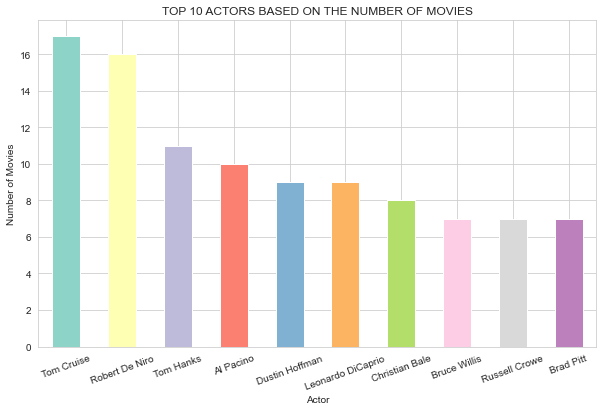

In [288]:
actor_counts = df['Actor'].value_counts()
top_5_actors = actor_counts.head(10)

c=sns.color_palette("Set3", n_colors=len(df['Actor'].unique()))
plt.figure(figsize=(10, 6))
top_5_actors.plot(kind='bar',color=c)
plt.title('TOP 10 ACTORS BASED ON THE NUMBER OF MOVIES')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=20)
plt.show()

The graph shows the top 10 actors based on the number of movies they have appeared in, which is a measure of their productivity and popularity in the film industry.The graph indicates that Tom Cruise is the most prolific actor among the ones listed, having appeared in more than 15 movies. He is followed by Robert De Niro and Tom Hanks.


# 12.ANALYSING DURATION OF EACH GENRES

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

78.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

86.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

89.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

94.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\categor

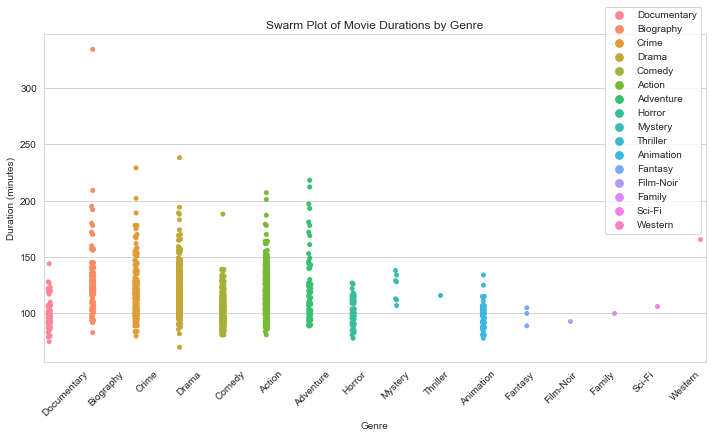

In [289]:
df['Duration(in_min)'] = pd.to_numeric(df['Duration(in_min)'], errors='coerce')

# Plot the swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df,x='Genre', y='Duration(in_min)',dodge=True,hue='Genre')
plt.title('Swarm Plot of Movie Durations by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1.1))
plt.show()

Each dot represent each movie.To understand the duration of movie in each genre.Drama and Comedy have wide range of durations Hence these are most popular genres.Scify,Western,Family have the fewest movies in the dataset ,indicating that they are less appealing or profitable for the mainstream market

In [39]:
import plotly.express as px

fig = px.box(df.sort_values(by='Duration(in_min)'), y='Duration(in_min)', x='Genre',color='Genre')
fig.show()

# 13.ANALYSING IMDB RATING OF ALL GENRES

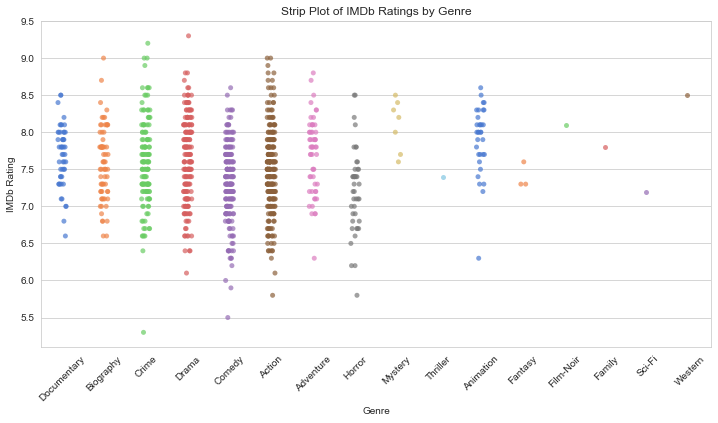

In [291]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='Genre', y='ImDb_Rating', data=df, jitter=True, alpha=0.7,palette='muted')
plt.title('Strip Plot of IMDb Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.show()

Action has the largest strip ,hence it is the most popular genre to get into the top 1000 movies of all time .One of the movie
of Comedy genre has got the least rating where as a Drama has got the highest rating

# 14.MULTIVARIATE ANALYSIS

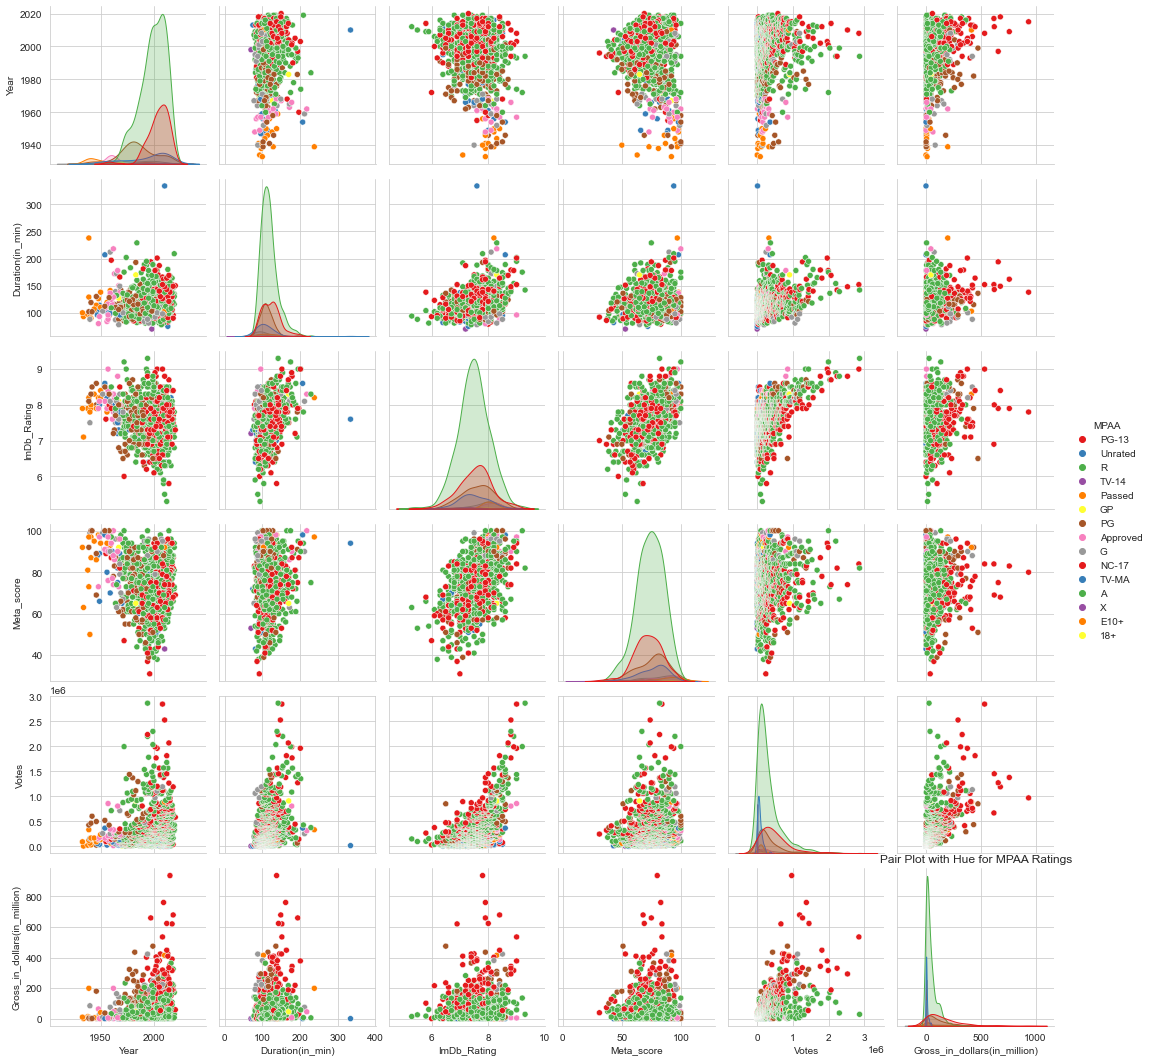

In [292]:
sns.pairplot(df, hue='MPAA', palette='Set1')
plt.title('Pair Plot with Hue for MPAA Ratings')
plt.show()

To describe pairwise relationship between all features.It helps us to find pattern,trends,correlation between any pairs of features

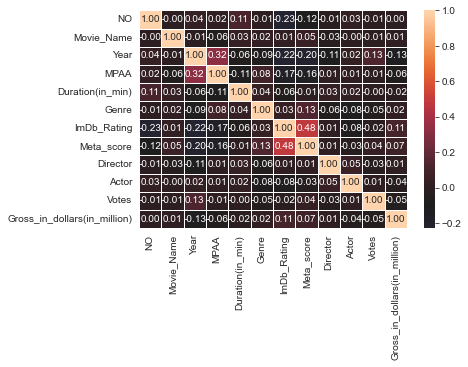

In [293]:
sns.heatmap (df_new_sort.corr(), annot = True,linewidths =0.75,linecolor = "White",fmt = ".2f",center = -0.1)
plt.show()

To find the relationship between the features.All features are highly correlated to itself.When comparing the correlations we infer that imdB rating and meta_score are more correlated

# 15.RELATIONSHIP BETWEEN IMDB RATING AND METASCORE

In [40]:
fig = px.scatter(df, x='ImDb_Rating', y='Meta_score', color='Year', hover_data=['Movie_Name'])
fig.show()

To analyse the positive correlation between iMDb rating and meta_score.The dark shade represents older movies where as lighter shades represent newer movies